In [39]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [25]:
#Import CSV to data frames
city_data_to_load=os.path.join('Resources','city_data.csv')
ride_data_to_load=os.path.join('Resources','ride_data.csv')

city_data_df.head(20)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Creating the city data frame
city_data_df=pd.read_csv(city_data_to_load)
#To know the quantity of data in each data cell inside de dataframe
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
#To see the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
#To see the diferent unique values in a series or column in a dataframe
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
#To see the quantity of values of each type of value in a serie or a column
sum(city_data_df['type']=='Rural')

18

In [17]:
#Creating the rides data frame
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5.739410e+12
1,South Michelleport,04/03/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,24/02/2019 04:29,33.44,2.005070e+12
3,Rodneyfort,10/02/2019 23:22,23.44,5.149250e+12
4,South Jack,06/03/2019 04:28,34.58,3.908450e+12


In [18]:
#Get all rows that not contain null values
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [21]:
#Makinhg sure there is no Null values inside the dataframe
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [20]:
#Knowing the type of data in each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [26]:
#Merging DataFrames, in this case the columns of 'City' are the ones who has the same 
#kind of datatype and have the same name
#new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3.908450e+12,46,Urban
5,South Latoya,11/03/2019 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,27/02/2019 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,26/04/2019 00:43,35.98,1.119540e+11,21,Urban
8,South Karenland,08/01/2019 03:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,09/03/2019 06:26,42.81,5.327640e+12,33,Urban


In [27]:
# Create the Urban city DataFrame.
#From the pyber DF we're extracting the info that has 'Urban' as a type and putting inside the urban cities DF
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3.908450e+12,46,Urban


In [30]:
# Create the Suburban and Rural city DataFrames.
# We're doing que same as above, but for the Suburban and Rural types
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [34]:
# Get the number of rides for urban cities.
# Here, we're grouping the qty of rides (counting) by each city, but we're creating a series
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [32]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [35]:
# Get average fare for each city in the urban cities.
# Here, we're doing the same as in the groupby's before, but in this case instead of counting we're calculating the mean
# of the fare column (a numerical column), we're also creating a series
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [36]:
# Get average fare for each city in the suburban and rural cities.
# Getting the average fare for each remains cities as well
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [37]:
# Get the average number of drivers for each urban city.
# Were getting another series
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [38]:
#We're getting the average of drivers for the remanis cities.
suburban_driver_count=suburban_cities_df.groupby(['city']).mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby(['city']).mean()['driver_count']

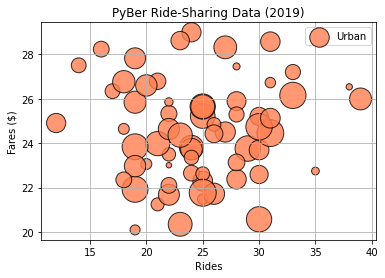

In [64]:
#By now we have created 3 different series for each type: number of ride (type_ride_count), average fare (type_avg_fare)
#and average of drivers (type_driver_count)
#Now we're creating a scatter plot individualy  and the putting all together in just one chart
#we're using the matlab method
#the fare is y_axis, the qty of rides de x_axis and drivers the size
urban_scatter=plt.scatter(urban_ride_count,
                          urban_avg_fare,
                          s=urban_driver_count*10,
                          edgecolor='black',
                          linewidths=1,
                          color = 'Coral',
                          alpha=.8,
                          label ='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid(True)
plt.xlabel('Rides')
plt.ylabel('Fares ($)')
plt.legend()
urban_scatter



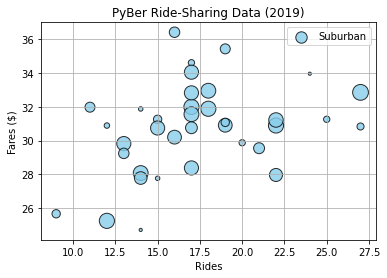

In [66]:
#Suburuban scattered chart
suburban_scatter=plt.scatter(suburban_ride_count,
                          suburban_avg_fare,
                          s=suburban_driver_count*10,
                          edgecolor='black',
                          linewidths=1,
                          color = 'skyblue',
                          alpha=.8,
                          label ='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid(True)
plt.xlabel('Rides')
plt.ylabel('Fares ($)')
plt.legend()
suburban_scatter

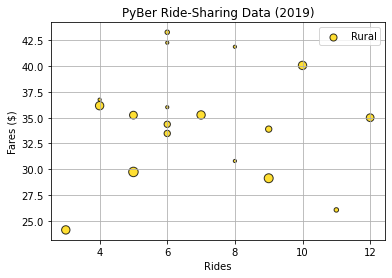

In [67]:
#Rural Scattered
rural_scatter=plt.scatter(rural_ride_count,
                          rural_avg_fare,
                          s=rural_driver_count*10,
                          edgecolor='black',
                          linewidths=1,
                          color = 'gold',
                          alpha=.8,
                          label ='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid(True)
plt.xlabel('Rides')
plt.ylabel('Fares ($)')
plt.legend()
rural_scatter

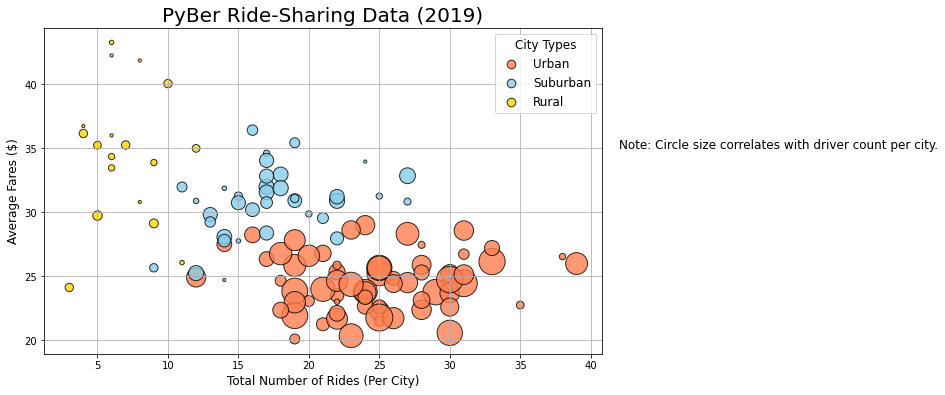

In [74]:
#To combine the three different scatters we just need to add the 3 plots in the same cell
plt.subplots(figsize=(10,6))
urban_scatter=plt.scatter(urban_ride_count,
                          urban_avg_fare,
                          s=urban_driver_count*10,
                          edgecolor='black',
                          linewidths=1,
                          color = 'Coral',
                          alpha=.8,
                          label ='Urban')
suburban_scatter=plt.scatter(suburban_ride_count,
                          suburban_avg_fare,
                          s=suburban_driver_count*10,
                          edgecolor='black',
                          linewidths=1,
                          color = 'skyblue',
                          alpha=.8,
                          label ='Suburban')
rural_scatter=plt.scatter(rural_ride_count,
                          rural_avg_fare,
                          s=rural_driver_count*10,
                          edgecolor='black',
                          linewidths=1,
                          color = 'gold',
                          alpha=.8,
                          label ='Rural')
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fares ($)', fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()